In [1]:
%matplotlib inline
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def read_trec(filename, metric_eval):
    fo = open(filename, 'r')
    x = []
    y = []
    for line in fo:
        line = line.split('\t')
        metric = line[0].strip()
        value = line[2].strip().replace('\n', '')

        if metric_eval in metric:
            metric_x = metric.replace('_', '')
            if metric_x not in x:
                x.append(metric_x)
            y.append(value)
    fo.close()
    return x, y

### SPARK CF - LAMBDA [TUNNING PARAMETERS]

In [93]:
path = '/Volumes/Tyr/Projects/UFMG/Sven/output/nyc/trec/spark_cf/lambda_tunning'
files = ['r10l0.1a0.01.eval', 'r10l0.01a0.01.eval', 'r10l0.03a0.01.eval', 'r10l0.04a0.01.eval', 'r10l0.05a0.01.eval', 'r10l0.06a0.01.eval', 'r10l0.07a0.01.eval']
dpi = 100
sns.set_style("whitegrid")
sns.set_context("paper")
# sns.set_palette(sns.color_palette("hls", 8))
sns.set_palette(sns.color_palette("GnBu_r", 10))

lines = itertools.cycle((':', '-', '--'))
marker = itertools.cycle((' ', 'o', 'v', '>', 's', '*',
                          '^', '<', ',', '.', 'p', '*', 'h', 'H',
                          'D', 'd'))


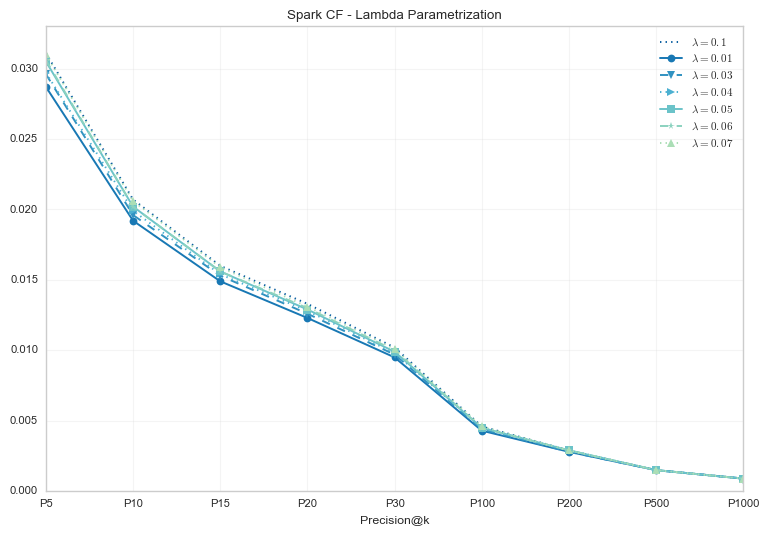

In [94]:
fig1 = plt.figure(figsize=(9,6))
#first = True
for file in files:
    ind = file.find('l')+1
    ind2 = file.find('a')
    label = '$\lambda = ' + file[ind:ind2] + '$'
    x, y = read_trec('%s/%s' % (path, file), 'P_')
#     if first:
#         plt.plot(range(0, len(y)), y, label=label, marker=next(marker), linestyle=next(lines), color='r')
#         first = False
#     else:
    plt.plot(range(0, len(y)), y, label=label, marker=next(marker), linestyle=next(lines))
        

plt.xlabel('Precision@k')
plt.xticks(range(0, len(x)), x)

axes = plt.gca()
axes.set_ylim([0,0.033])

plt_legend = plt.legend(loc='best', shadow=True)
frame = plt_legend.get_frame()
frame.set_facecolor('0.90')

plt.grid(True, alpha=0.2)

title = 'Spark CF - Lambda Parametrization'
plt.title(title)
plt.show()

### SPARK CF - LATENT FACTORS [TUNNING PARAMETERS]

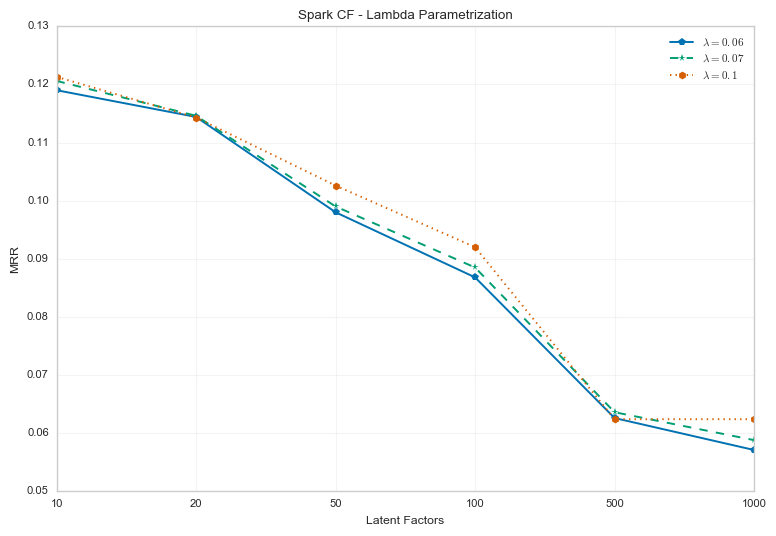

In [99]:
path = '/Volumes/Tyr/Projects/UFMG/Sven/output/nyc/trec/spark_cf/latent_tunning'
files = ['r10l0.1a0.01.eval', 'r10l0.06a0.01.eval', 'r10l0.07a0.01.eval', 'r20l0.1a0.01.eval', 'r20l0.06a0.01.eval', 'r20l0.07a0.01.eval', 'r50l0.1a0.01.eval', 'r50l0.06a0.01.eval', 'r50l0.07a0.01.eval', 'r100l0.1a0.01.eval', 'r100l0.06a0.01.eval', 'r100l0.07a0.01.eval', 'r500l0.06a0.01.eval', 'r500l0.07a0.01.eval', 'r500l0.1a0.01.eval', 'r1000l0.1a0.01.eval', 'r1000l0.06a0.01.eval', 'r1000l0.07a0.01.eval']

def get_params(name):
    index_lambda = name.find('l')
    index_alpha = name.find('a')
    index_trec = name.find('.eva')

    rank = name[1:index_lambda]
    lambda_ = name[index_lambda+1:index_alpha]
    alpha = name[index_alpha+1:index_trec]
    return int(rank), float(lambda_), float(alpha)    

X = []

def group_by_lambda():
    data_group = []
    for file in files:
        rank, lambda_, alpha = get_params(file)
        x, y = read_trec('%s/%s' % (path, file), 'recip_rank')
        data_group.append((lambda_, rank, float(y[0])))
        
        if rank not in X:
            X.append(rank)

    return data_group

data_ = group_by_lambda()
data_.sort(key=lambda tup: (tup[0], tup[1]))

Y = []
L = []
y_ = []
for lambda_, rank, y in data_:
    y_.append(y)

    if lambda_ not in L:
        L.append(lambda_)

    if len(y_) == len(X):
        Y.append(y_)
        y_ = []
        
sns.set_palette(sns.color_palette("colorblind", 3))
fig2 = plt.figure(figsize=(9,6))
for y, label in zip(Y, L):
    label = '$\lambda = ' + str(label) + '$'
    plt.plot(range(0, len(X)), y, label=label, marker=next(marker), linestyle=next(lines))

plt.ylabel('MRR')
plt.xlabel('Latent Factors')
plt.xticks(range(0, len(X)), X)

axes = plt.gca()

plt_legend = plt.legend(loc='best', shadow=True)
frame = plt_legend.get_frame()
frame.set_facecolor('0.90')

plt.grid(True, alpha=0.2)

title = 'Spark CF - Lambda Parametrization'
plt.title(title)
plt.show()

### GEOGRAPHIC BASELINE

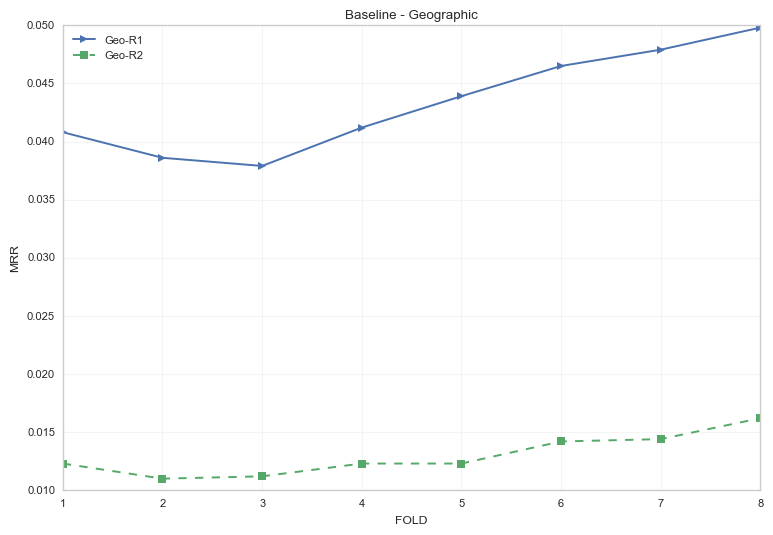

In [125]:
path = '/Volumes/Tyr/Projects/UFMG/Sven/output/nyc/trec/geo'
files = ['fold_1.eval', 'fold_2.eval', 'fold_3.eval', 'fold_4.eval', 'fold_5.eval', 'fold_6.eval', 'fold_7.eval', 'fold_8.eval']

fig3 = plt.figure(figsize=(9,6))
sns.set_palette(sns.color_palette("deep", 3))

X = []
Y1 = []
Y2 = []
for file in files:
    name = file.replace('.eval', '').replace('_', ' ')
    name = name.title()
    x, y = read_trec('%s/rank1_%s' % (path, file), 'recip_rank')
    Y1.append(y)
    x, y = read_trec('%s/rank2_%s' % (path, file), 'recip_rank')
    Y2.append(y)
    X.append(name)

plt.plot(range(0, len(Y1)), Y1, marker=next(marker), label='Geo-R1', linestyle=next(lines))
plt.plot(range(0, len(Y2)), Y2, marker=next(marker), label='Geo-R2', linestyle=next(lines))

plt.ylabel('MRR')
plt.xlabel('FOLD')
plt.xticks(range(0, len(X)), range(1,len(X)+1))

axes = plt.gca()
#axes.set_ylim([0,0.033])

plt_legend = plt.legend(loc='best', shadow=True)
frame = plt_legend.get_frame()
frame.set_facecolor('0.90')

plt.grid(True, alpha=0.2)

title = 'Baseline - Geographic'
plt.title(title)
plt.show()

In [126]:
pp = PdfPages('../output/nyc/trec/%s.pdf' % title)
pp.savefig(fig3, dpi=200)
# pp.savefig(fig2, dpi=200)
pp.close()
plt.close()